# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

## Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 1. Cleaning data

### Read data and perform some basic analysis

In [2]:
df_flights = pd.read_csv('/kaggle/input/flights/challenges/data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


In [3]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


In [4]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

### Identify any null or missing data, and impute appropriate replacement values.

        

In [5]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [6]:
df_flights.loc[(df_flights.DepDel15.isnull()) & (df_flights.DepDelay > 15) , "DepDel15" ] = 1
df_flights.loc[(df_flights.DepDel15.isnull()) & (df_flights.DepDelay <= 15) , "DepDel15" ] = 0

In [7]:
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

### Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.

        

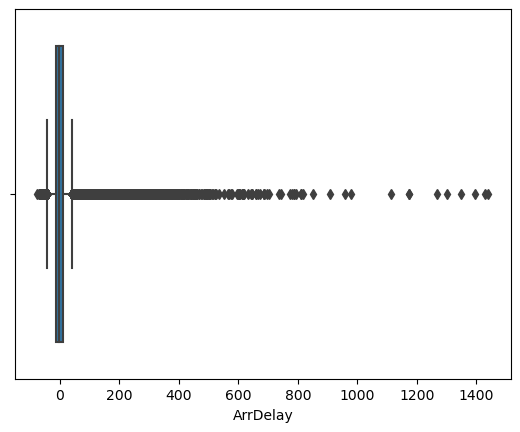

<AxesSubplot:xlabel='DepDelay'>

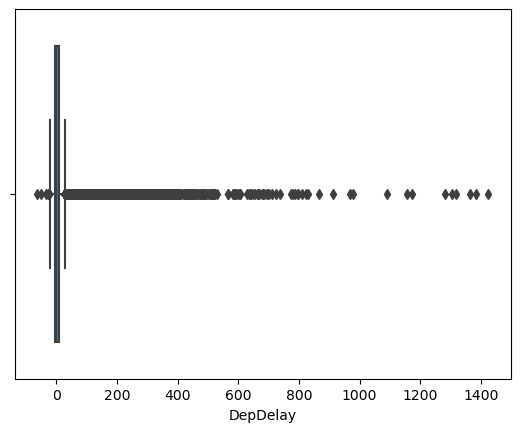

In [8]:
sns.boxplot(x = df_flights.ArrDelay)
plt.show()
sns.boxplot(x = df_flights.DepDelay)

In [9]:
df_flights = df_flights[np.abs(df_flights.ArrDelay-df_flights.ArrDelay.mean()) <= (3*df_flights.ArrDelay.std())]
df_flights = df_flights[np.abs(df_flights.DepDelay-df_flights.DepDelay.mean()) <= (3*df_flights.DepDelay.std())]

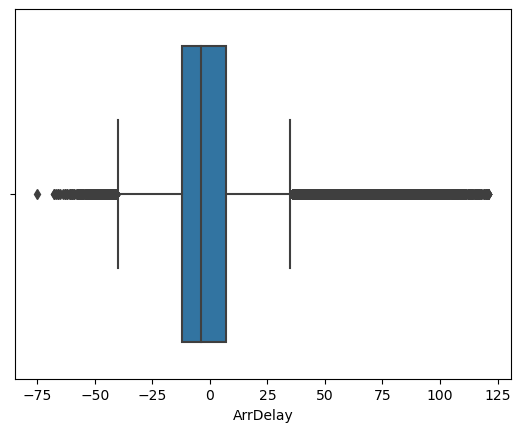

<AxesSubplot:xlabel='DepDelay'>

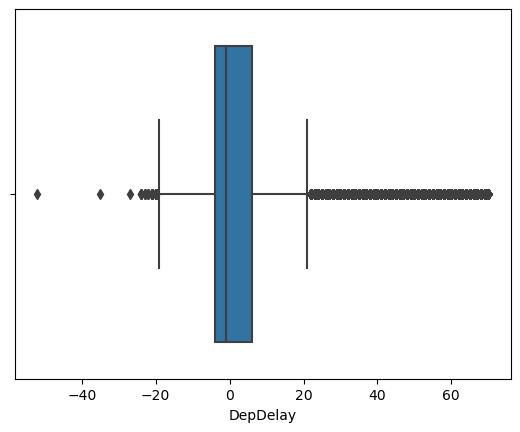

In [10]:
sns.boxplot(x = df_flights.ArrDelay)
plt.show()
sns.boxplot(x = df_flights.DepDelay)

## 2. Explore the cleaned dataset

### View summary statistics for the numeric fields in the dataset. 

In [11]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,258315.0,258315.000000,258315.000000,258315.000000,258315.000000,258315.000000,258315.000000,258315.000000,258315.000000,258315.000000,258315.000000,258315.000000,258315.000000
mean,2013.0,6.998362,15.811227,3.903335,12748.017703,12739.536752,1313.762639,3.963126,0.156948,1494.775704,-0.028558,0.174578,0.011141
std,0.0,1.991516,8.818407,1.991146,1503.244044,1503.766403,470.405986,14.663601,0.363752,491.199265,19.077525,0.379606,0.104964
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-52.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,910.000000,-4.000000,0.000000,1114.000000,-12.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1310.000000,-1.000000,0.000000,1517.000000,-4.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1715.000000,6.000000,0.000000,1910.000000,7.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,70.000000,1.000000,2359.000000,121.000000,1.000000,1.000000


### Determine the distribution of the **DepDelay** and **ArrDelay** columns.

<AxesSubplot:>

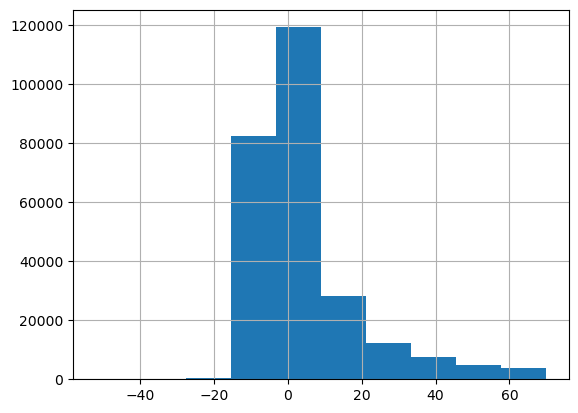

In [12]:
df_flights.DepDelay.hist()

<AxesSubplot:>

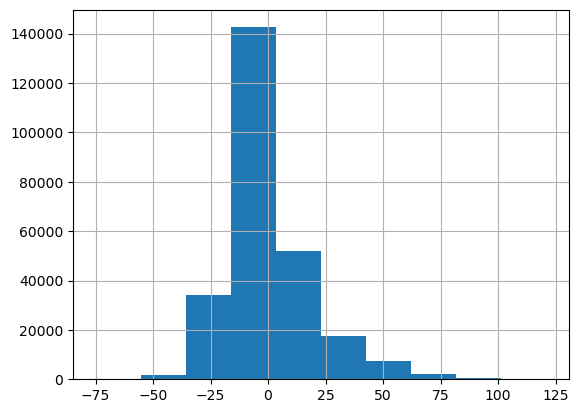

In [13]:
df_flights.ArrDelay.hist()

### *What are the average (mean) departure and arrival delays?*

In [14]:
print(f"The average Departure delay is: {df_flights.DepDelay.mean()}")

The average Departure delay is: 3.96312641542303


In [15]:
print(f"The average Arrival delay is: {df_flights.ArrDelay.mean()}")

The average Arrival delay is: -0.02855815574008478


### *How do the carriers compare in terms of arrival delay performance?*

In [16]:
mean_delays = df_flights.groupby("Carrier")[[ "ArrDelay"]].mean().sort_values("ArrDelay" , ascending = False)

In [17]:
mean_delays

,ArrDelay
Carrier,
F9,4.835322
WN,3.495083
MQ,3.193146
FL,1.428141
YV,0.476065
OO,0.170751
B6,0.045272
US,-0.143345
AA,-0.562123


<AxesSubplot:xlabel='Carrier', ylabel='ArrDelay'>

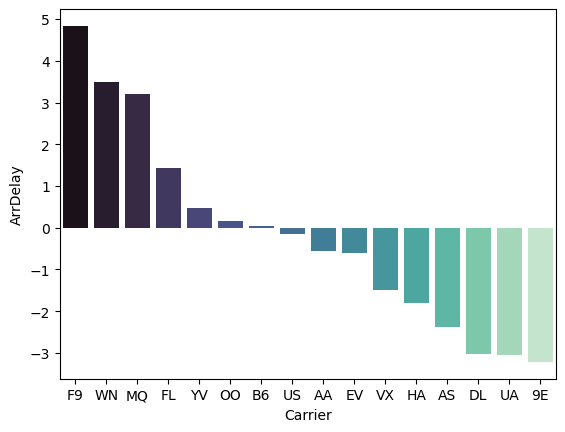

In [18]:
sns.barplot(data = mean_delays , x = mean_delays.index , y =  "ArrDelay", palette = "mako")

### *Is there a noticable difference in arrival delays for different days of the week?*

In [19]:
mean_delays_week = df_flights.groupby("DayOfWeek")[[ "ArrDelay"]].mean().sort_values("DayOfWeek" , ascending = True)

In [20]:
mean_delays_week

,ArrDelay
DayOfWeek,
1,0.105016
2,-1.284741
3,0.234377
4,2.244584
5,1.252838
6,-2.462252
7,-0.793648


<AxesSubplot:xlabel='DayOfWeek', ylabel='ArrDelay'>

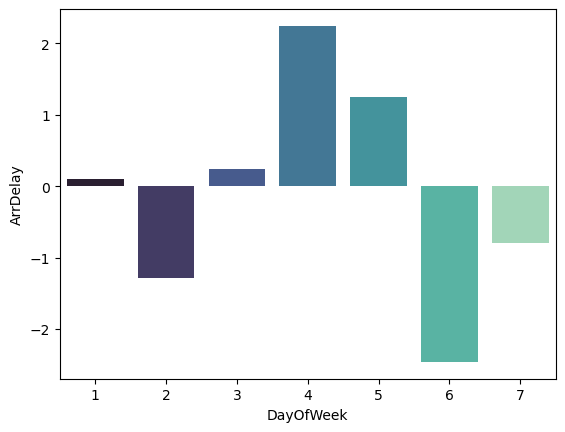

In [21]:
sns.barplot(data = mean_delays_week , x = mean_delays_week.index , y =  "ArrDelay", palette = "mako")

### *Which departure airport has the highest average departure delay?*

In [22]:
mean_dep_delays_airport = df_flights.groupby("OriginAirportName")[[ "DepDelay"]].mean().sort_values("DepDelay" , ascending = False)

In [23]:
mean_dep_delays_airport.max()

DepDelay    10.183652
dtype: float64

### *Do **late** departures tend to result in longer arrival delays than on-time departures?*

In [24]:
df_flights.loc[df_flights.DepDel15 == 1,"ArrDelay"].mean()

28.58110108036111

In [25]:
df_flights.loc[df_flights.DepDel15 == 0,"ArrDelay"].mean()

-5.354713394222424

### *Which route (from origin airport to destination airport) has the most **late** arrivals?*

In [26]:
df_flights["Route"] = df_flights["OriginAirportName"] + "_" + df_flights["DestAirportName"]

In [51]:
late_routes = df_flights.loc[df_flights.ArrDelay >0].sort_values("ArrDelay" , ascending = False).head(10)[["ArrDelay" ,"Route"]].reset_index(drop= True)
late_routes

,ArrDelay,Route
0,121,Dallas/Fort Worth International_Phoenix Sky Ha...
1,121,Dallas/Fort Worth International_San Antonio In...
2,121,George Bush Intercontinental/Houston_Nashville...
3,121,Charlotte Douglas International_Logan Internat...
4,121,Austin - Bergstrom International_Denver Intern...
5,121,Fort Lauderdale-Hollywood International_Hartsf...
6,121,Denver International_Los Angeles International
7,121,Fort Lauderdale-Hollywood International_Jackso...
8,121,Hartsfield-Jackson Atlanta International_Chica...
9,121,Logan International_Ronald Reagan Washington N...


In [52]:
print("Top 10 late Routes are listed below:")
for i in late_routes.Route.values:
    print(f"- {i}.")

Top 10 late Routes are listed below:
- Dallas/Fort Worth International_Phoenix Sky Harbor International.
- Dallas/Fort Worth International_San Antonio International.
- George Bush Intercontinental/Houston_Nashville International.
- Charlotte Douglas International_Logan International.
- Austin - Bergstrom International_Denver International.
- Fort Lauderdale-Hollywood International_Hartsfield-Jackson Atlanta International.
- Denver International_Los Angeles International.
- Fort Lauderdale-Hollywood International_Jacksonville International.
- Hartsfield-Jackson Atlanta International_Chicago O'Hare International.
- Logan International_Ronald Reagan Washington National.


### *Which route has the highest average arrival delay?*

In [55]:
avg_late_routes = df_flights.loc[df_flights.ArrDelay >0].groupby("Route")[["ArrDelay"]].mean().sort_values("ArrDelay" , ascending = False).head(10)
avg_late_routes

,ArrDelay
Route,
Pittsburgh International_Raleigh-Durham International,63.000000
Philadelphia International_Sacramento International,48.500000
John F. Kennedy International_Kansas City International,48.250000
Cincinnati/Northern Kentucky International_LaGuardia,48.000000
Reno/Tahoe International_Chicago O'Hare International,47.000000
Newark Liberty International_Salt Lake City International,47.000000
John F. Kennedy International_Sacramento International,45.600000
John F. Kennedy International_Detroit Metro Wayne County,44.454545
Southwest Florida International_Theodore Francis Green State,44.000000


In [57]:
print("Routes with the highest average late arrivals are listed below:")
for i in avg_late_routes.index:
    print(f"- {i}")

Routes with the highest average late arrivals are listed below:
- Pittsburgh International_Raleigh-Durham International
- Philadelphia International_Sacramento International
- John F. Kennedy International_Kansas City International
- Cincinnati/Northern Kentucky International_LaGuardia
- Reno/Tahoe International_Chicago O'Hare International
- Newark Liberty International_Salt Lake City International
- John F. Kennedy International_Sacramento International
- John F. Kennedy International_Detroit Metro Wayne County
- Southwest Florida International_Theodore Francis Green State
- Cleveland-Hopkins International_Portland International
